# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [9]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [10]:
#descargar html

url = "https://ycharts.com/companies/TSLA/revenues"
# Intentar primera solicitud con un agente de usuario estándar
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"
}
response = requests.get(url, headers=headers)
time.sleep(10)  # Espera opcional de 10 segundos antes de la siguiente solicitud
# Verificar si la solicitud inicial fue bloqueada
if response.status_code == 403:
    # Si se bloquea, intentar nuevamente con un agente de usuario diferente
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    time.sleep(10)  # Espera opcional de 10 segundos antes de la siguiente solicitud
# Extraer el HTML de la respuesta final
html_data = response.text
# Imprimir o manejar el HTML según sea necesario
print(html_data)









<!doctype html>
<html lang="en" ng-jq>
    <head>
        <title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>

        <meta name="viewport" content="width=device-width, initial-scale=1.0" />
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer>
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>


        
        <script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createEle

In [11]:
# Analizar el HTML con BeautifulSoup

# Crea un objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
# Busca todas las tablas en el HTML
tables = soup.find_all('table')
# Imprime la cantidad de tablas encontradas
print(f'Se encontraron {len(tables)} tablas en la página.')

tables


Se encontraron 4 tablas en la página.


[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                                 24.93B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2023</td>
 <td class="text-right">
                             
                  

In [12]:
# Crear un DataFrame vacío para almacenar todos los datos
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
if len(tables) >= 2:
    # Iterar sobre las dos tablas relevantes (tablas 0 y 1)
    for i in range(2):
        table = tables[i]
     # Extraer datos de la tabla
        for row in table.find_all("tr"):
            col = row.find_all("td")
            if col and len(col) >= 2:  # Asegurarse de que hay al menos dos columnas
                Date = col[0].text.strip()
                Revenue = col[1].text.strip().replace("$", "").replace(",", "")
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
                    "Date": Date,
                    "Revenue": Revenue
                    }, index=[0])], ignore_index=True)
    
    # Mostrar los primeros registros del DataFrame
    print (tesla_revenue.head())

else:
    print("No se encontraron suficientes tablas en la página.")
     


                 Date Revenue
0      March 31, 2024  21.30B
1   December 31, 2023  25.17B
2  September 30, 2023  23.35B
3       June 30, 2023  24.93B
4      March 31, 2023  23.33B


In [13]:
#limpiamos y procesamos el dataframe
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
esla_revenue = tesla_revenue.dropna()


# Eliminar filas con valores NaN en 
tesla_revenue = tesla_revenue.dropna()

# Función para convertir los valores con sufijos a números
def convert_revenue(revenue_str):
    if revenue_str[-1] == 'B':
        return float(revenue_str[:-1]) * 1e9
    elif revenue_str[-1] == 'M':
        return float(revenue_str[:-1]) * 1e6
    else:
        return float(revenue_str)

# Aplicar la función de conversión a la columna 'Revenue'
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].apply(convert_revenue)


# Mostrar los primeros registros del DataFrame limpio
print(tesla_revenue.head())

                 Date       Revenue
0      March 31, 2024  2.130000e+10
1   December 31, 2023  2.517000e+10
2  September 30, 2023  2.335000e+10
3       June 30, 2023  2.493000e+10
4      March 31, 2023  2.333000e+10


In [19]:
# Convertir el DataFrame en una lista de tuplas
tesla_tuples = list(tesla_revenue.to_records(index=False))
tesla_tuples

[np.record(('March 31, 2024', 21300000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('December 31, 2023', 25170000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('September 30, 2023', 23350000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('June 30, 2023', 24930000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('March 31, 2023', 23330000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('December 31, 2022', 24320000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('September 30, 2022', 21450000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('June 30, 2022', 16930000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('March 31, 2022', 18760000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('December 31, 2021', 17720000000.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('September 30, 2021', 13760000000.0), dtype=[('Date', 'O'), ('Revenue', '

In [14]:
connection = sqlite3.connect("Tesla1.db")
connection

In [15]:
#creamos el cursor para interactuar con la base de datos
cursor = connection.cursor()
#creamos la tabla
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")


In [22]:
#insertamos los datos en la base de datos, desde la tupla donde ? seran intercambiados por los valores de la tupla (placeholders)
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
#confirmamos para guardar
connection.commit()

In [23]:

# miramos los datos desde la tabla principal

for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('March 31, 2024', 21300000000.0)
('December 31, 2023', 25170000000.0)
('September 30, 2023', 23350000000.0)
('June 30, 2023', 24930000000.0)
('March 31, 2023', 23330000000.0)
('December 31, 2022', 24320000000.0)
('September 30, 2022', 21450000000.0)
('June 30, 2022', 16930000000.0)
('March 31, 2022', 18760000000.0)
('December 31, 2021', 17720000000.0)
('September 30, 2021', 13760000000.0)
('June 30, 2021', 11960000000.0)
('March 31, 2021', 10390000000.0)
('December 31, 2020', 10740000000.0)
('September 30, 2020', 8771000000.0)
('June 30, 2020', 6036000000.0)
('March 31, 2020', 5985000000.0)
('December 31, 2019', 7384000000.0)
('September 30, 2019', 6303000000.0)
('June 30, 2019', 6350000000.0)
('March 31, 2019', 4541000000.0)
('December 31, 2018', 7226000000.0)
('September 30, 2018', 6824000000.0)
('June 30, 2018', 4002000000.0)
('March 31, 2018', 3409000000.0)
('December 31, 2017', 3288000000.0)
('September 30, 2017', 2985000000.0)
('June 30, 2017', 2790000000.0)
('March 31, 2017', 2

In [36]:
#preparamos datos para visualizacion

# Leer los datos de la tabla revenue en un DataFrame
tesla_revenue = pd.read_sql_query("SELECT * FROM revenue", connection)

# Convertir la columna 'Date' a formato datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Ordenar los datos por fecha
tesla_revenue = tesla_revenue.sort_values(by='Date')
tesla_revenue.head()

,Date,Revenue
49,2011-12-31,39380000.0
48,2012-03-31,30170000.0
47,2012-06-30,26650000.0
46,2012-09-30,50100000.0
45,2012-12-31,306330000.0


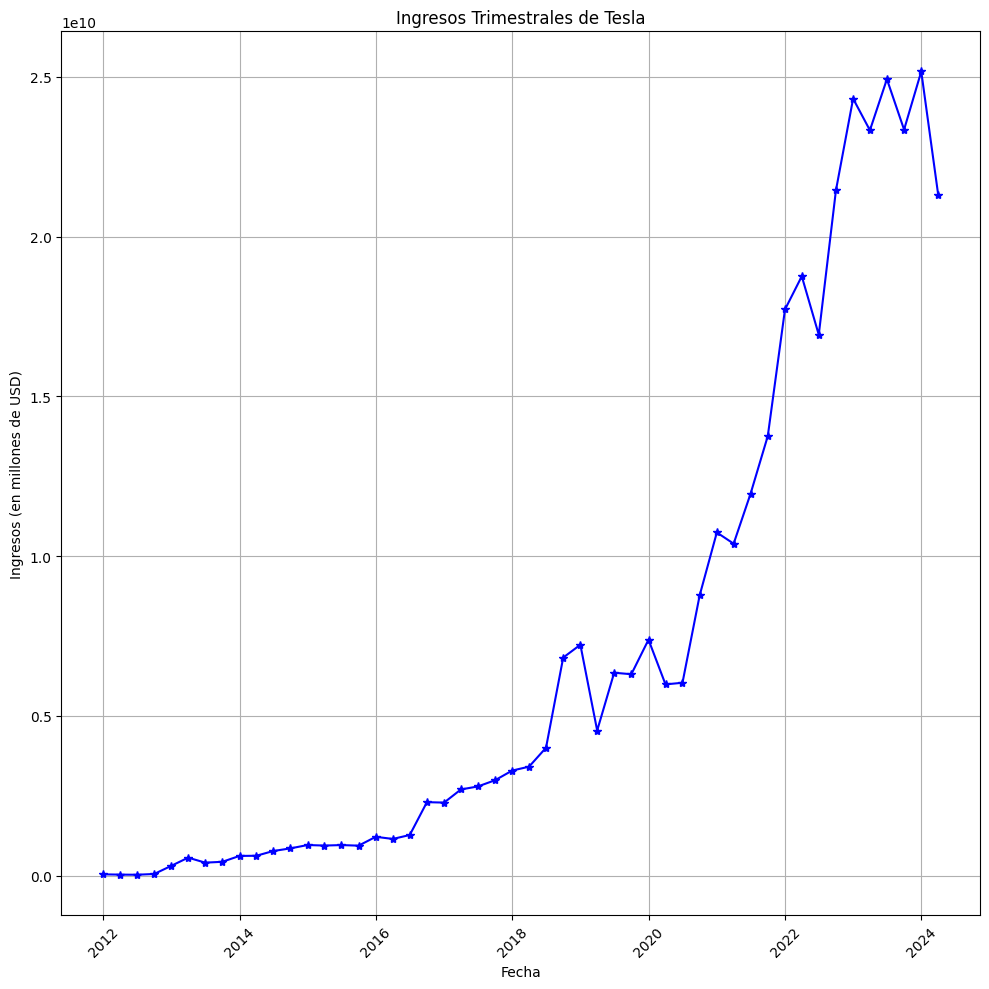

In [25]:
# Gráfico de Líneas de Ingresos Trimestrales
plt.figure(figsize=(10, 10))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'],  marker='*', linestyle='-', color='b')
plt.title('Ingresos Trimestrales de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (en millones de USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_5941/1115277630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Revenue', data=tesla_revenue, palette='viridis')


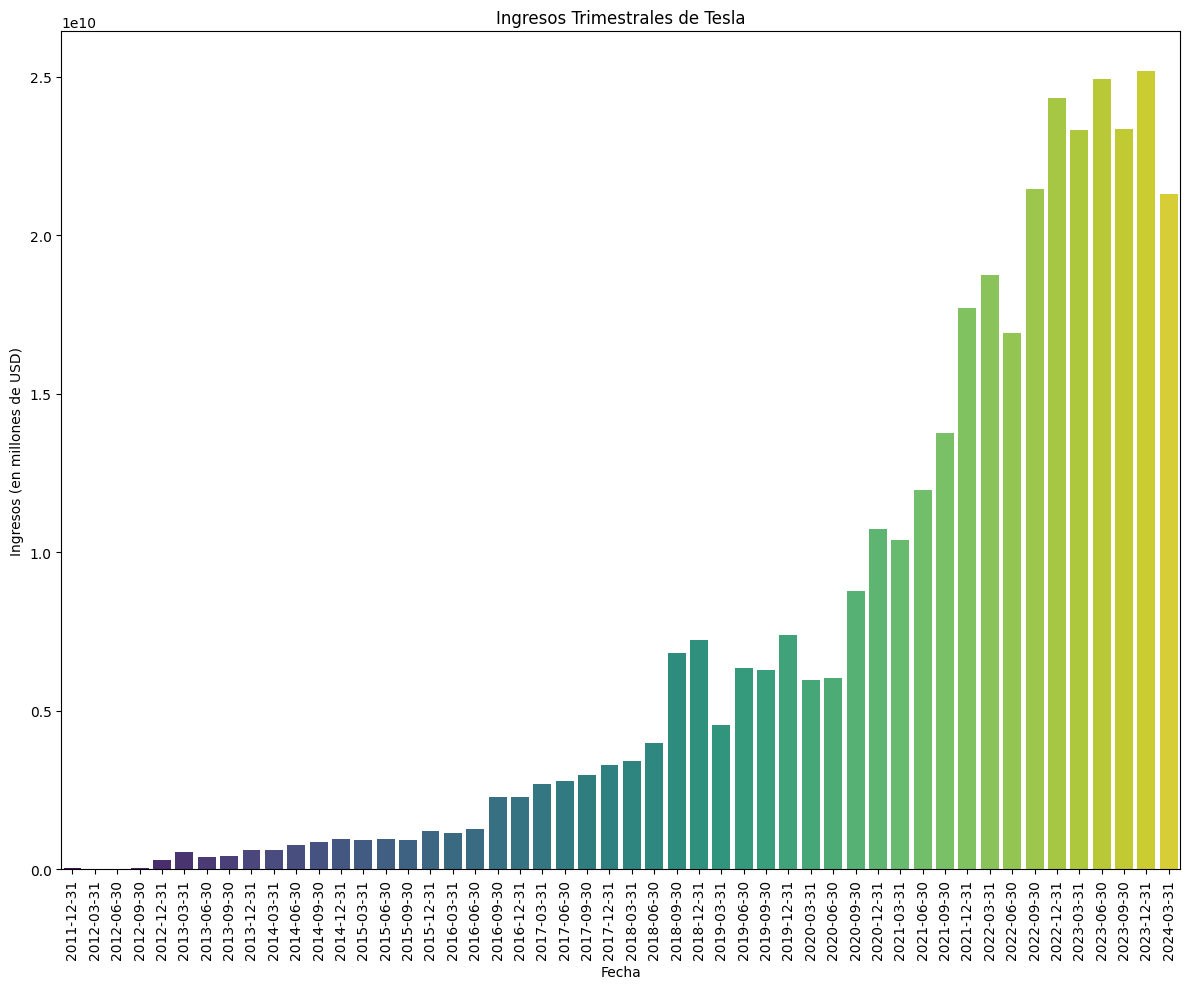

In [26]:
# Gráfico de Barras de Ingresos Trimestrales
plt.figure(figsize=(12, 10))
sns.barplot(x='Date', y='Revenue', data=tesla_revenue, palette='viridis')
plt.title('Ingresos Trimestrales de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (en millones de USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_5941/165191750.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


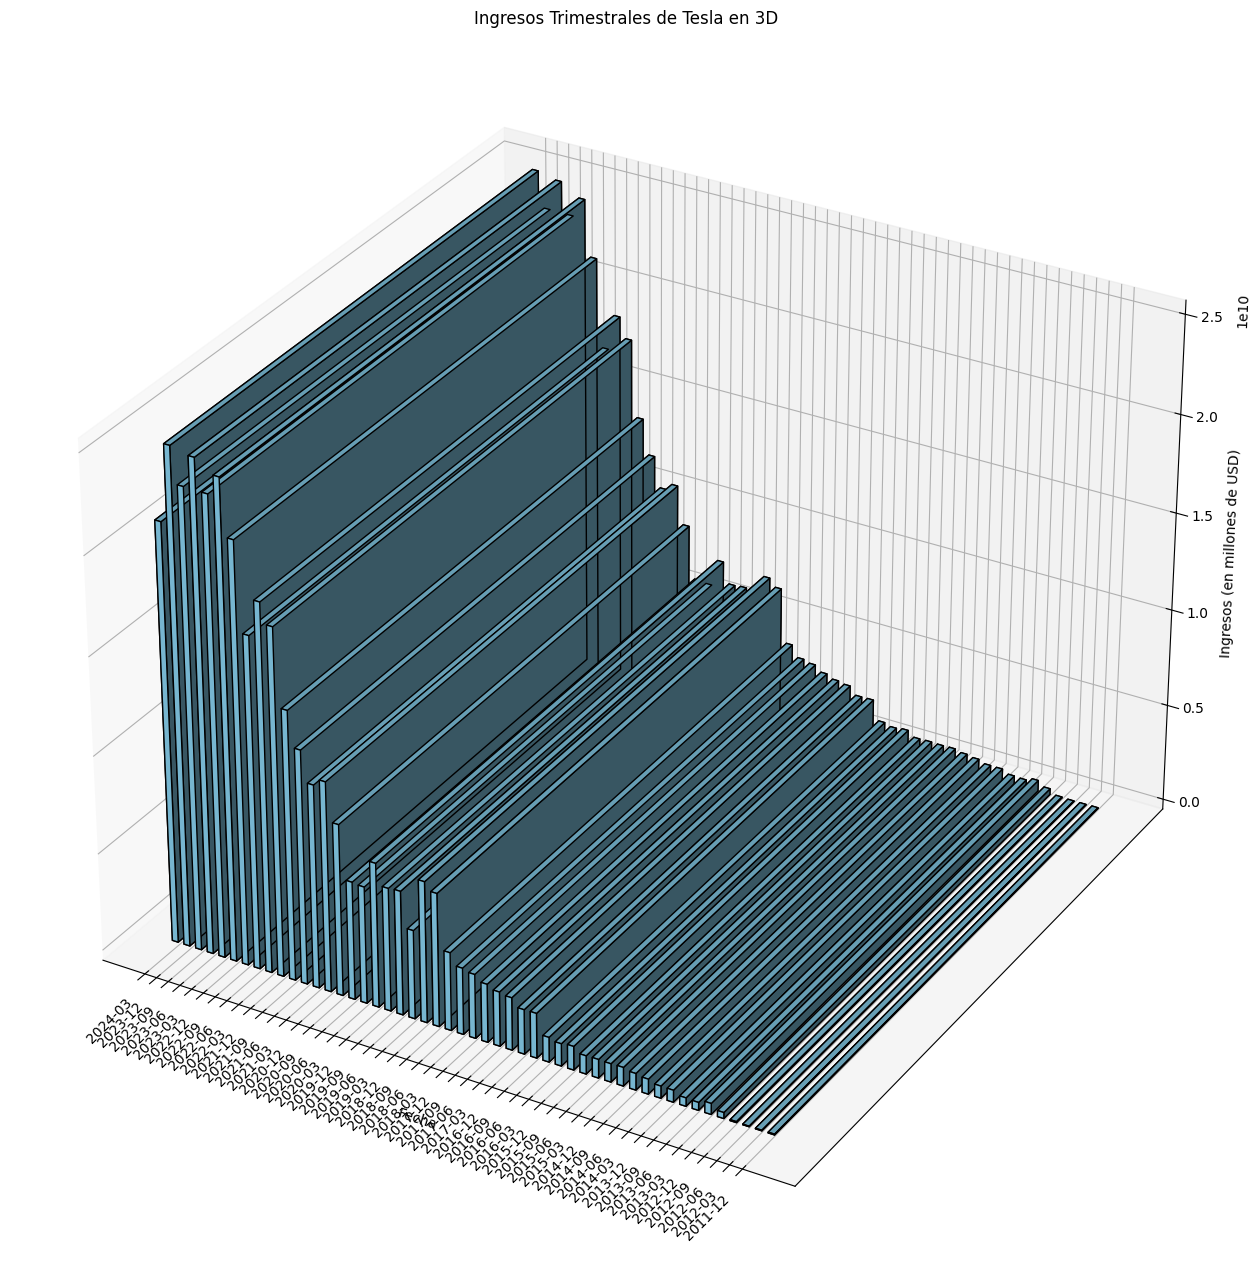

In [35]:

# Gráfico de Barras en 3D de Ingresos Trimestrales
x = tesla_revenue.index
y = [0] * len(tesla_revenue)
z = [0] * len(tesla_revenue)
dx = [0.5] * len(tesla_revenue)
dy = [0.5] * len(tesla_revenue)
dz = tesla_revenue['Revenue'].values

# Crear el gráfico 3D
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Crear las barras 3D
ax.bar3d(x, y, z, dx, dy, dz, color='skyblue', edgecolor='k')

# Ajustar los ticks y las etiquetas
ax.set_xticks(x)
ax.set_xticklabels(tesla_revenue['Date'].dt.strftime('%Y-%m'), rotation=45, ha='right')
ax.set_yticks([])  # Quitar las etiquetas del eje y
ax.set_xlabel('Fecha')
ax.set_ylabel('')
ax.set_zlabel('Ingresos (en millones de USD)')

# Título y configuración del gráfico
ax.set_title('Ingresos Trimestrales de Tesla en 3D')
plt.tight_layout()

# Mostrar el gráfico
plt.show()